In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

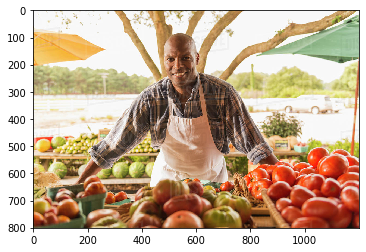

In [7]:
full = cv2.imread('DATA/PT02.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
plt.imshow(full)

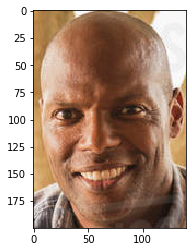

In [42]:
face = full[85:285, 475:615]
plt.imshow(face)

In [45]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

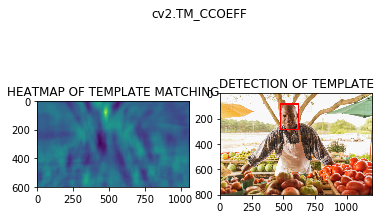

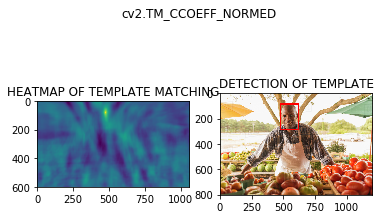

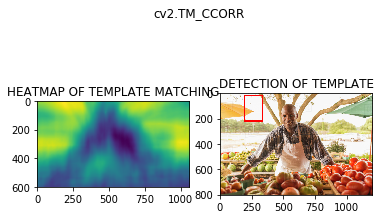

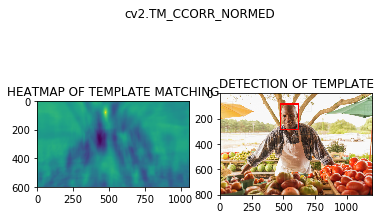

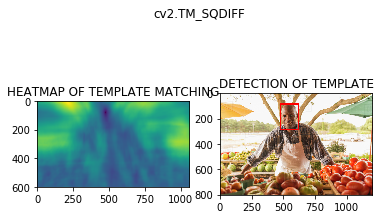

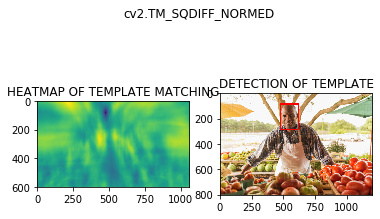

In [49]:
for m in methods : 
    #create copy
    full_copy = full.copy()
    method = eval(m)
    
    #template matching
    res=cv2.matchTemplate(full_copy,face,method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc
    else :
        top_left=max_loc
        
    height,width,channels=face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    #plot and show the images
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    plt.suptitle(m)
    plt.show()
    print('\n')

In [46]:
my_method = eval('cv2.TM_CCOEFF')
res=cv2.matchTemplate(full,face,my_method)

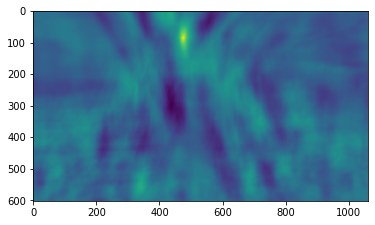

In [47]:
plt.imshow(res)